##Prerequisite (Libraries, read file)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
file_path = '/content/drive/MyDrive/LnData烈酒_Poyu/cleaned_data.csv'
df = pd.read_csv(file_path)


###change gender NaN into numeric value -1

In [ ]:
# Replace NaN values in 'gender' column with -1
df['gender'] = df['gender'].fillna(-1)

# Display the first few rows
df.head()

,Unnamed: 0,inv_num,channel,item_name,unit_price,quantity,amount,seller_name,gender,inv_date,inv_time,uuid,age,categ,year,month,day_of_the_week
0,2,TP08796949,菸酒,ABS伏特加原味750ml,399,2,798,佳賀板新有限公司,male,2023-10-29,12:57:56,DDD94689-8D18-403E-AB7D-97F59B9C6EDA,25.0,伏特加,2023,10,7
1,3,TE08679221,菸酒,0.7公升玉山五年陳年清香高粱酒瓜瓞綿延,1500,1,1500,台灣菸酒股份有限公司花蓮酒廠,male,2023-10-29,10:01:05,4209295216d38de1,44.0,高粱,2023,10,7
2,5,SG63810119,菸酒,0.3公升玉山台灣高粱酒58%,165,1,165,台灣菸酒股份有限公司烏日啤酒廠,female,2023-10-29,10:32:33,cbccdd58403f396f,40.0,高粱,2023,10,7
3,6,SK43888166,菸酒,0.3公升玉山台灣高粱酒58%,165,1,165,臺灣菸酒股份有限公司竹南啤酒廠,male,2023-10-29,10:51:56,8388fd296849f7ef,35.0,高粱,2023,10,7
4,7,TJ81526548,菸酒,0.3L-58度金門高粱酒,220,1,220,金門酒廠實業股份有限公司尚義機場展售處,-1,2023-10-29,11:58:55,5dc19069a6759e50,NaN,高粱,2023,10,7


In [ ]:
#download chinese display file
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-11-22 05:56:42--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.134.101, 74.125.134.102, 74.125.134.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cl8ruth7ehknck6p3pms4d426935krgo/1700632575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=e452e1a8-4e56-4f00-84cc-513e08e71344 [following]
--2023-11-22 05:56:43--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cl8ruth7ehknck6p3pms4d426935krgo/1700632575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=e452e1a8-4e56-4f00-84cc-513e08e71344
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to doc-0

###Chinese character setup

In [ ]:
#matplotlib
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
#seaborn
sns.set(font="Taipei Sans TC Beta")

## Data Analysis Details

###1. Age and Category Pattern

<ipython-input-6-aa343a4794cb>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='age_group', y='amount', hue='categ', ci=None)


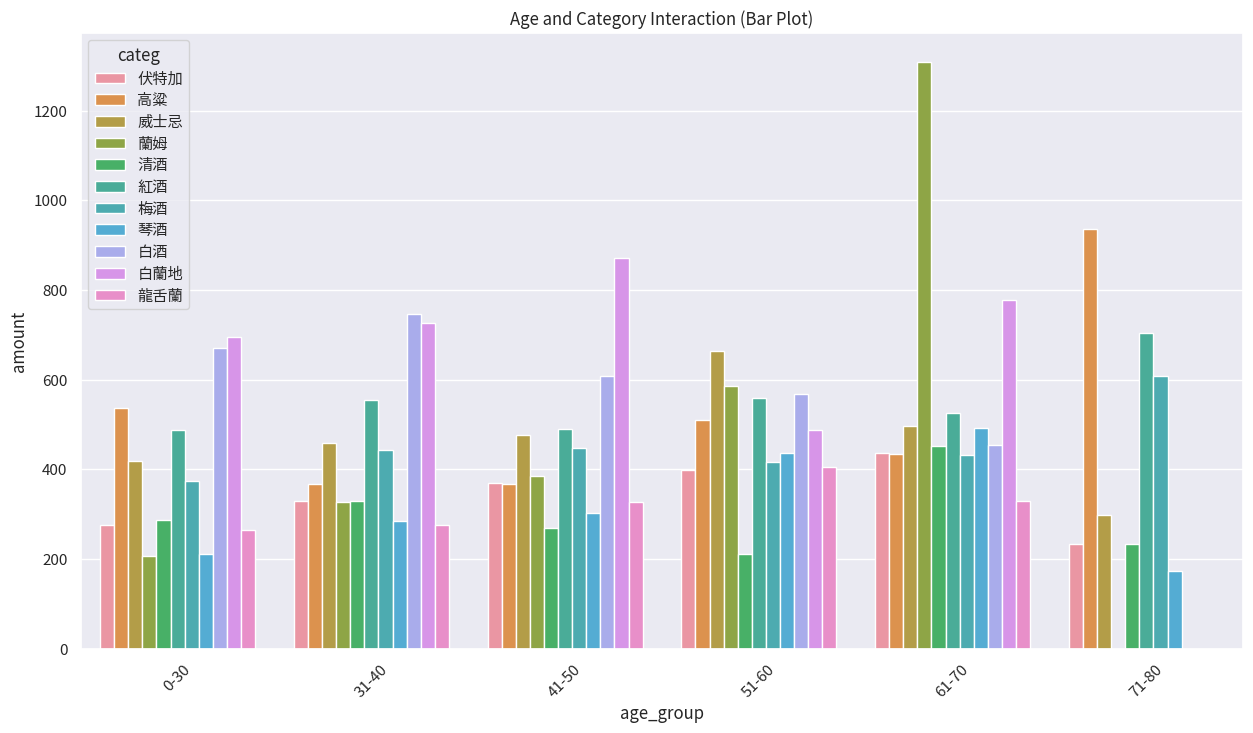

In [ ]:
plt.figure(figsize=(15, 8))
# Define bin (intervals) edges and labels => used for pd.cut method
bin_edges = [0, 30, 40, 50, 60, 70, 80]
bin_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create new column 'age_group'
df['age_group'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels, right=False)
# set ci to none, no 信賴區間
sns.barplot(data=df, x='age_group', y='amount', hue='categ', ci=None)
# rotate the angle of x-axis
plt.xticks(rotation=45)

plt.title('Age and Category Interaction (Bar Plot)')
plt.show()


###2. Use K-Means Clustering to distinguish groups

K-Means分群實作

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

#prepare the dataset for clustering
# make gender column into numeric values
df['gender'] = df['gender'].replace({'male': 0, 'female': 1})

#replace null age value with mean
df['age'].fillna(df['age'].mean(), inplace=True)
#replace null amount value with mean
df['amount'].fillna(df['amount'].mean(), inplace=True)

# Select relevant features for clustering (adjust as needed)
features = df[['age', 'amount', 'gender', 'year', 'month', 'day_of_the_week']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


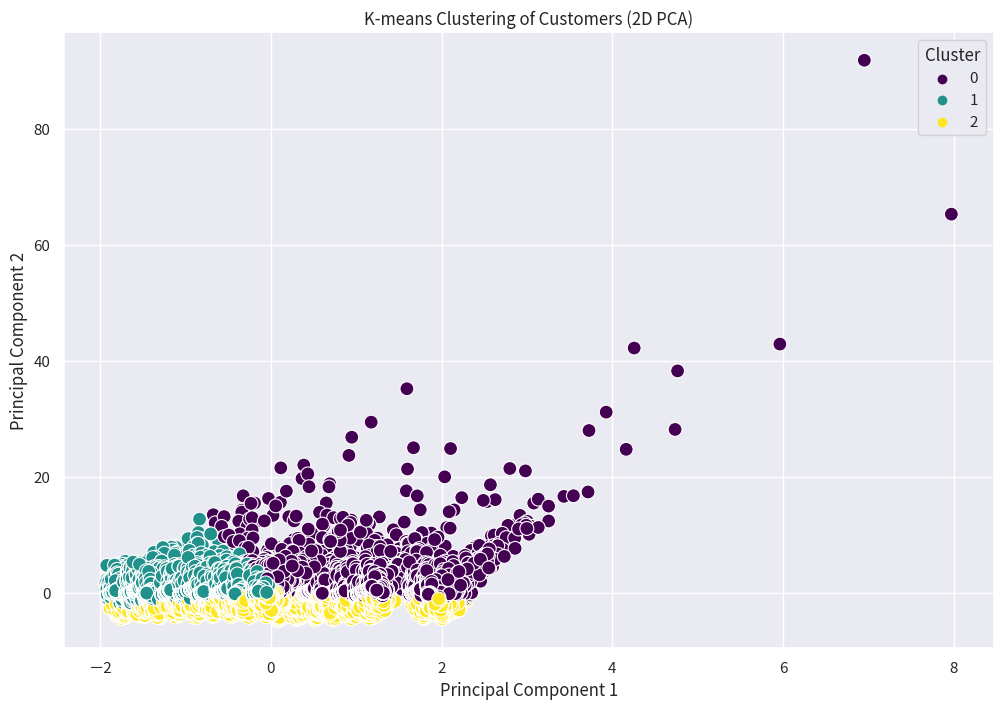

In [ ]:
# Standardize the features
scaler = StandardScaler()
#scaled_features is a numpy array
scaled_features = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Choose the number of clusters (K)
k = 3

# Apply K-means clustering on the principal components
kmeans = KMeans(n_clusters=k, random_state=42)
# add 'cluster' label
df['cluster'] = kmeans.fit_predict(principal_components)

# Visualize the clusters using PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pd.DataFrame(principal_components, columns=['PC1', 'PC2']).join(df['cluster']), palette='viridis', s=100)
plt.title('K-means Clustering of Customers (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


用elbow method找K => 斜率開始驟降的 => 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

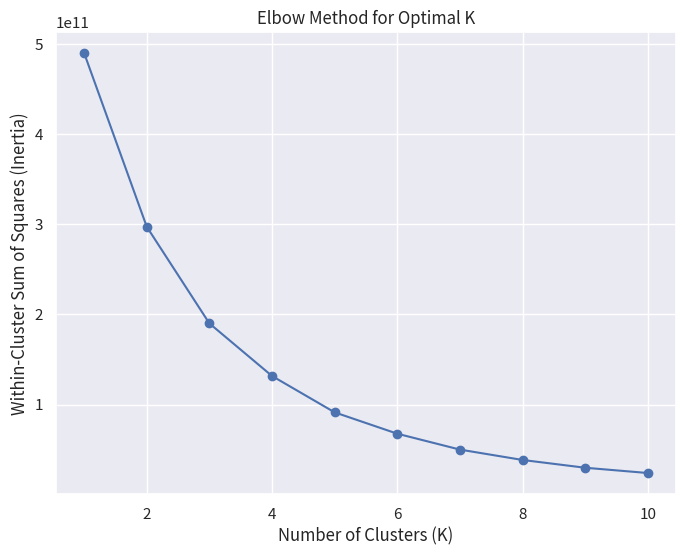

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'features' is your standardized feature matrix
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()


In [ ]:
# Explained variance ratio (lose dimension以外loss了多少)
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

Explained Variance Ratio: [0.24327591 0.17063842]


In [ ]:
cluster_profiles = df.groupby('cluster').mean()
print(cluster_profiles)

            Unnamed: 0  unit_price  quantity      amount    gender        age  \
cluster                                                                         
0        195974.627817  440.119358  1.334163  597.433235 -0.412800  39.556324   
1        473993.628322  379.766147  1.257642  472.934382 -0.395521  39.047006   
2        224747.509726  298.063882  1.126228  328.018984  0.380379  35.881196   

                year     month  day_of_the_week  
cluster                                          
0        2022.989748  4.491495         3.727005  
1        2022.014183  8.767241         4.216826  
2        2022.743198  7.007408         5.456202  


<ipython-input-21-0eda28a71d35>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = df.groupby('cluster').mean()


###3. 分群結果分析

分群人數

In [ ]:
cluster_counts = df['cluster'].value_counts()

for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} data points")

Cluster 1: 237679 data points
Cluster 0: 174014 data points
Cluster 2: 106775 data points


分群基本statistics展示

In [ ]:
cluster_stats = df.groupby('cluster').describe()

# Display summary statistics for 'amount', 'age', and other numeric columns
print(cluster_stats[['amount', 'age']])


           amount                                                      \
            count        mean          std   min    25%    50%    75%   
cluster                                                                 
0        174014.0  597.433235  1462.978236  20.0  170.0  320.0  598.0   
1        237679.0  472.934382   659.368660  20.0  170.0  299.0  519.0   
2        106775.0  328.018984   296.733029  20.0  135.0  259.0  415.0   

                        age                                                   \
              max     count       mean       std   min        25%        50%   
cluster                                                                        
0        194400.0  174014.0  39.556324  3.763866  18.0  38.565972  38.565972   
1         23450.0  237679.0  39.047006  2.870251  22.0  38.565972  38.565972   
2          6708.0  106775.0  35.881196  5.329861  18.0  35.000000  38.565972   

                          
               75%   max  
cluster                   

Amount & Cluster 關係

    cluster      amount_bins   count   total  percentage
0         0     (0.0, 100.0]   18233  174014   10.477893
1         0   (100.0, 200.0]   35568  174014   20.439735
2         0   (200.0, 500.0]   67693  174014   38.900893
3         0  (500.0, 1000.0]   32166  174014   18.484720
4         0    (1000.0, inf]   20354  174014   11.696760
5         1     (0.0, 100.0]   21364  237679    8.988594
6         1   (100.0, 200.0]   54019  237679   22.727713
7         1   (200.0, 500.0]  101597  237679   42.745468
8         1  (500.0, 1000.0]   40965  237679   17.235431
9         1    (1000.0, inf]   19734  237679    8.302795
10        2     (0.0, 100.0]   18601  106775   17.420745
11        2   (100.0, 200.0]   26665  106775   24.973074
12        2   (200.0, 500.0]   43698  106775   40.925310
13        2  (500.0, 1000.0]   14537  106775   13.614610
14        2    (1000.0, inf]    3274  106775    3.066261


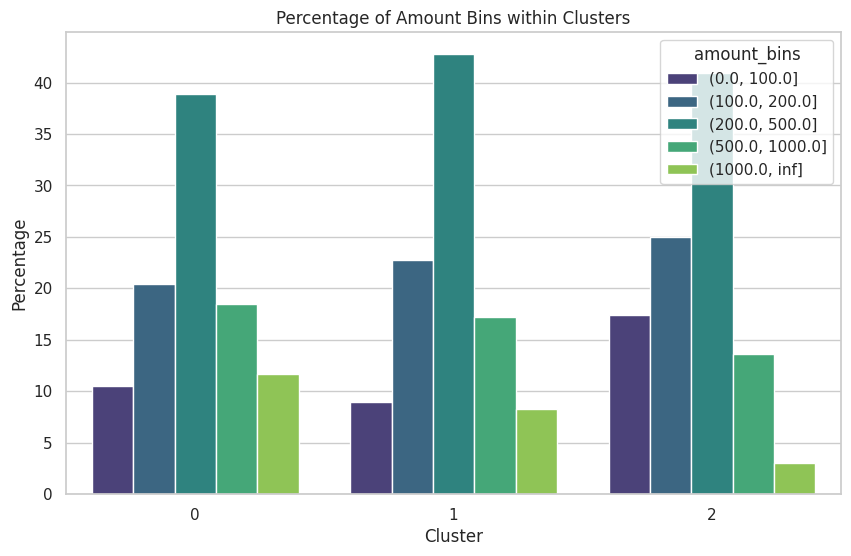

In [ ]:
custom_bin_edges = [0, 100, 200, 500, 1000, float('inf')]  # Adjust the bin edges as needed

# Assuming 'df' is your DataFrame
df['amount_bins'] = pd.cut(df['amount'], bins=custom_bin_edges)

# Calculate the percentages
cluster_counts = df.groupby(['cluster', 'amount_bins']).size().reset_index(name='count')
cluster_totals = df.groupby('cluster').size().reset_index(name='total')
cluster_counts = cluster_counts.merge(cluster_totals, on='cluster')
cluster_counts['percentage'] = (cluster_counts['count'] / cluster_counts['total']) * 100

# Print the result
print(cluster_counts)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='percentage', hue='amount_bins', data=cluster_counts, palette='viridis')
plt.title('Percentage of Amount Bins within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.show()


第 0 群：總金額較高價位的酒（>500, >1000元）會買比較多，推測較有錢，但是較便宜的酒也會購買。

第 1 群：便宜和貴的酒購買總金額都介於中間。

第 2 群：總金額<100元的比例比另外兩組多兩倍，推測喜歡去超商買便宜酒精喝。對總金額高的酒（>500, >1000元），觀察到高價位的酒買不多。

Age & Cluster

    cluster        age_bins   count  percentage
0         0  (17.944, 29.2]     170    0.097693
1         0    (29.2, 40.4]  156761   90.085280
2         0    (40.4, 51.6]   11994    6.892549
3         0    (51.6, 62.8]    4410    2.534279
4         0    (62.8, 74.0]     679    0.390198
5         1  (17.944, 29.2]     526    0.221307
6         1    (29.2, 40.4]  223004   93.825706
7         1    (40.4, 51.6]   10570    4.447175
8         1    (51.6, 62.8]    3094    1.301756
9         1    (62.8, 74.0]     485    0.204057
10        2  (17.944, 29.2]   16429   15.386561
11        2    (29.2, 40.4]   88251   82.651370
12        2    (40.4, 51.6]    2095    1.962070
13        2    (51.6, 62.8]       0    0.000000
14        2    (62.8, 74.0]       0    0.000000


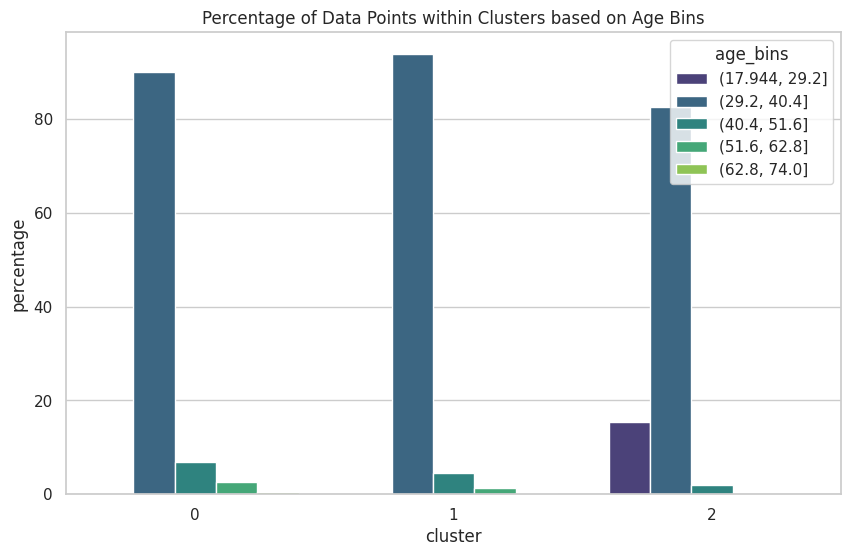

In [ ]:
# Assuming 'df' is your DataFrame
df['age_bins'] = pd.cut(df['age'], bins=5)  # Adjust the number of bins as needed

# Calculate the count for each combination of 'cluster' and 'age_bins'
counts = df.groupby(['cluster', 'age_bins']).size().reset_index(name='count')

# Calculate the total count for each 'cluster'
total_counts = counts.groupby('cluster')['count'].transform('sum')

# Calculate the percentage
counts['percentage'] = (counts['count'] / total_counts) * 100

# Print the result
print(counts)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='cluster', y='percentage', hue='age_bins', palette='viridis')
plt.title('Percentage of Data Points within Clusters based on Age Bins')
plt.show()


第 0 群：接近90%的消費族群集中在 29-40歲，有多了快10%的人在>40歲的族群。

第 1 群：接近95%的消費族群集中在 29-40歲，>40歲的族群差不多5%而已，比第0群少。

第 2 群：年輕族群佔比算很多 （17-29歲）佔了15%，其他兩組都<1％。29-40歲的族群比例稍微比其他兩組少一點，大於40歲的就少很多。

Gender & Cluster

   cluster  gender   count  percentage
0        0      -1   96134   55.244980
1        0       0   53579   30.790051
2        0       1   24301   13.964968
3        1      -1  128648   54.126784
4        1       0   74390   31.298516
5        1       1   34641   14.574699
6        2      -1   12337   11.554203
7        2       0   41486   38.853664
8        2       1   52952   49.592133


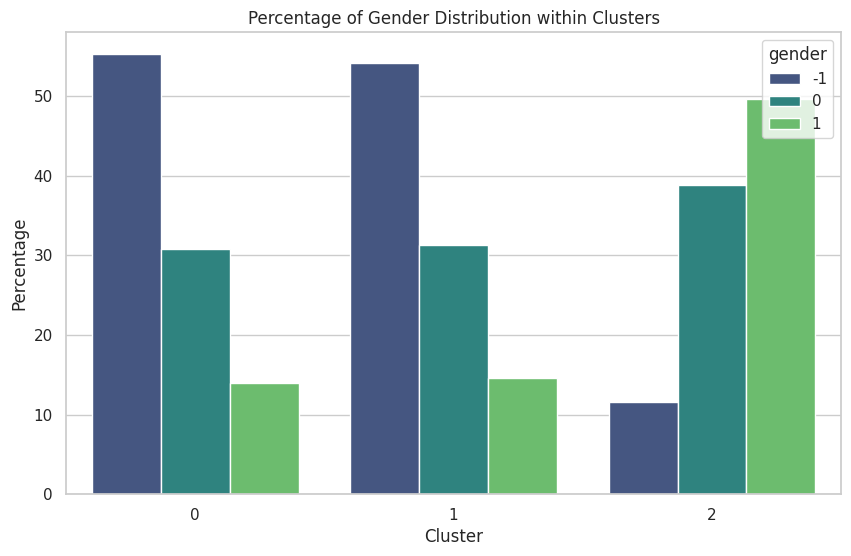

In [ ]:
# Create a countplot
plt.figure(figsize=(10, 6))

# Calculate the count for each combination of 'cluster' and 'gender'
counts_gender = df.groupby(['cluster', 'gender']).size().reset_index(name='count')

# Calculate the total count for each 'cluster'
total_counts_gender = counts_gender.groupby('cluster')['count'].transform('sum')

# Calculate the percentage
counts_gender['percentage'] = (counts_gender['count'] / total_counts_gender) * 100

# Print the result
print(counts_gender)

# Plot the bar plot
sns.barplot(data=counts_gender, x='cluster', y='percentage', hue='gender', palette='viridis')
plt.title('Percentage of Gender Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.show()



第 0 群：男生差不多為女生的兩倍。

第 1 群：男生差不多為女生的兩倍。

第 2 群：女生為男生的1.3倍。

##最後分群結論

第 0 群：高消費族群，佔總體約 55%，平均年齡約 39 歲（年齡中等，但也包含較多年齡>40的族群），平均單筆購買金額高單筆購買數量較高，男生較多。

第 1 群：中等消費族群，佔總體約 31%，平均年齡約 39 歲（年齡中等），平均購買金額和單筆購買數量均屬中等水平，男生較多。

第 2 群：低消費族群，佔總體約 12%，平均年齡約 36 歲 (相對年輕)，平均購買金額和單筆購買數量較低，女生較多。






